# NBA position clustering & classification

------------------------

In [472]:
pd.options.display.max_columns = 160
pd.options.display.max_rows = 350
%matplotlib inline

# 시각화 함수 정의 

### 포지션 시각화

In [473]:
def position_plot(df, n):
    c = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "grey", "lime", "navy", "violet", "olive"]
    plt.figure(figsize=(16,9),dpi=200)
    for i in range(n) :
        plt.scatter(df[df["cluster"]==i].iloc[:,0], df[df["cluster"]==i].iloc[:,1], color=c[i], marker="o", s=20, alpha=0.3, label=str(i))
        plt.legend()
    plt.xlabel("PC1")
    plt.ylabel("PC2")

### 클러스터별 특성 시각화

In [474]:
def cluster_plot(dfX, n_clusters):
    col =  dfX.columns

    color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "grey", "lime", "navy", "violet", "olive"]

    plt.figure(figsize=(16,9), dpi=200)

    plt.subplot(311)
    half = int((len(col) - 4) / 2)
    c = col[ : half]
    ind = range(len(c))
    
    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[:half], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


    plt.subplot(313)
    c = col[half : len(col)-1]
    ind = range(len(c))

    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[half:len(b)-1], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

    plt.show()

### 실루엣 시각화

In [475]:
def silhouette_plot(X, labels) :
    if isinstance(labels, pd.DataFrame):
        labels = np.array((labels.iloc[:,0]))
        
    color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "grey", "lime", "navy", "violet", "olive"]
    
    plt.figure(figsize=(10, 7), dpi=150)
    
    #silhouette
    from sklearn.metrics import silhouette_samples    
    silhouette_vals = silhouette_samples(X, labels, metric="euclidean")
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]

    y_ax_lower, y_ax_upper = 0, 0

    yticks = []

    plt.subplot(1,2,1)

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 edgecolor="none",
                 color=color[i],
                 height = 1.0,
                )
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels)
    plt.ylabel("Cluster")
    plt.xlabel("Avg Silhouette coefficient %0.3f" %silhouette_avg)

    
    
    # elbow 
    from sklearn.cluster import KMeans
    plt.subplot(1,2,2)
    distortions = []
    for i in range(1,15):
        model = KMeans(n_clusters=i, init="k-means++", random_state=0).fit(X)
        distortions.append(model.inertia_)

    plt.plot(range(1,15), distortions, marker="o", color="orangered")
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    
    plt.tight_layout()
    plt.show()
            

## 데이터 불러오기 

In [476]:
data = pd.read_csv("player2.csv")
data = data.iloc[:,1:]

data = data[data["Games"]>=30]
data = data[data["Min"]>=10]
data.shape

(6929, 152)

In [477]:
dfy = data[["Pos"]]
dfX = data.iloc[:, 4:data.shape[1]-1]

### 데이터 표준화

In [478]:
from sklearn.preprocessing import StandardScaler
dfX= pd.DataFrame(StandardScaler().fit_transform(dfX), columns=dfX.columns)

-----

# NBA 포지션 시각화

## LDA로 차원축소 

In [479]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
ldaDf = lda.fit_transform(dfX, dfy)

In [480]:
lda.explained_variance_ratio_

array([ 0.82138558,  0.13632651])

In [481]:
ldaDf = pd.DataFrame(ldaDf)

In [482]:
dfX = dfX.reset_index()
del dfX["index"]

In [483]:
dfy = dfy.reset_index()
del dfy["index"]
ldaDf["pos"] = dfy

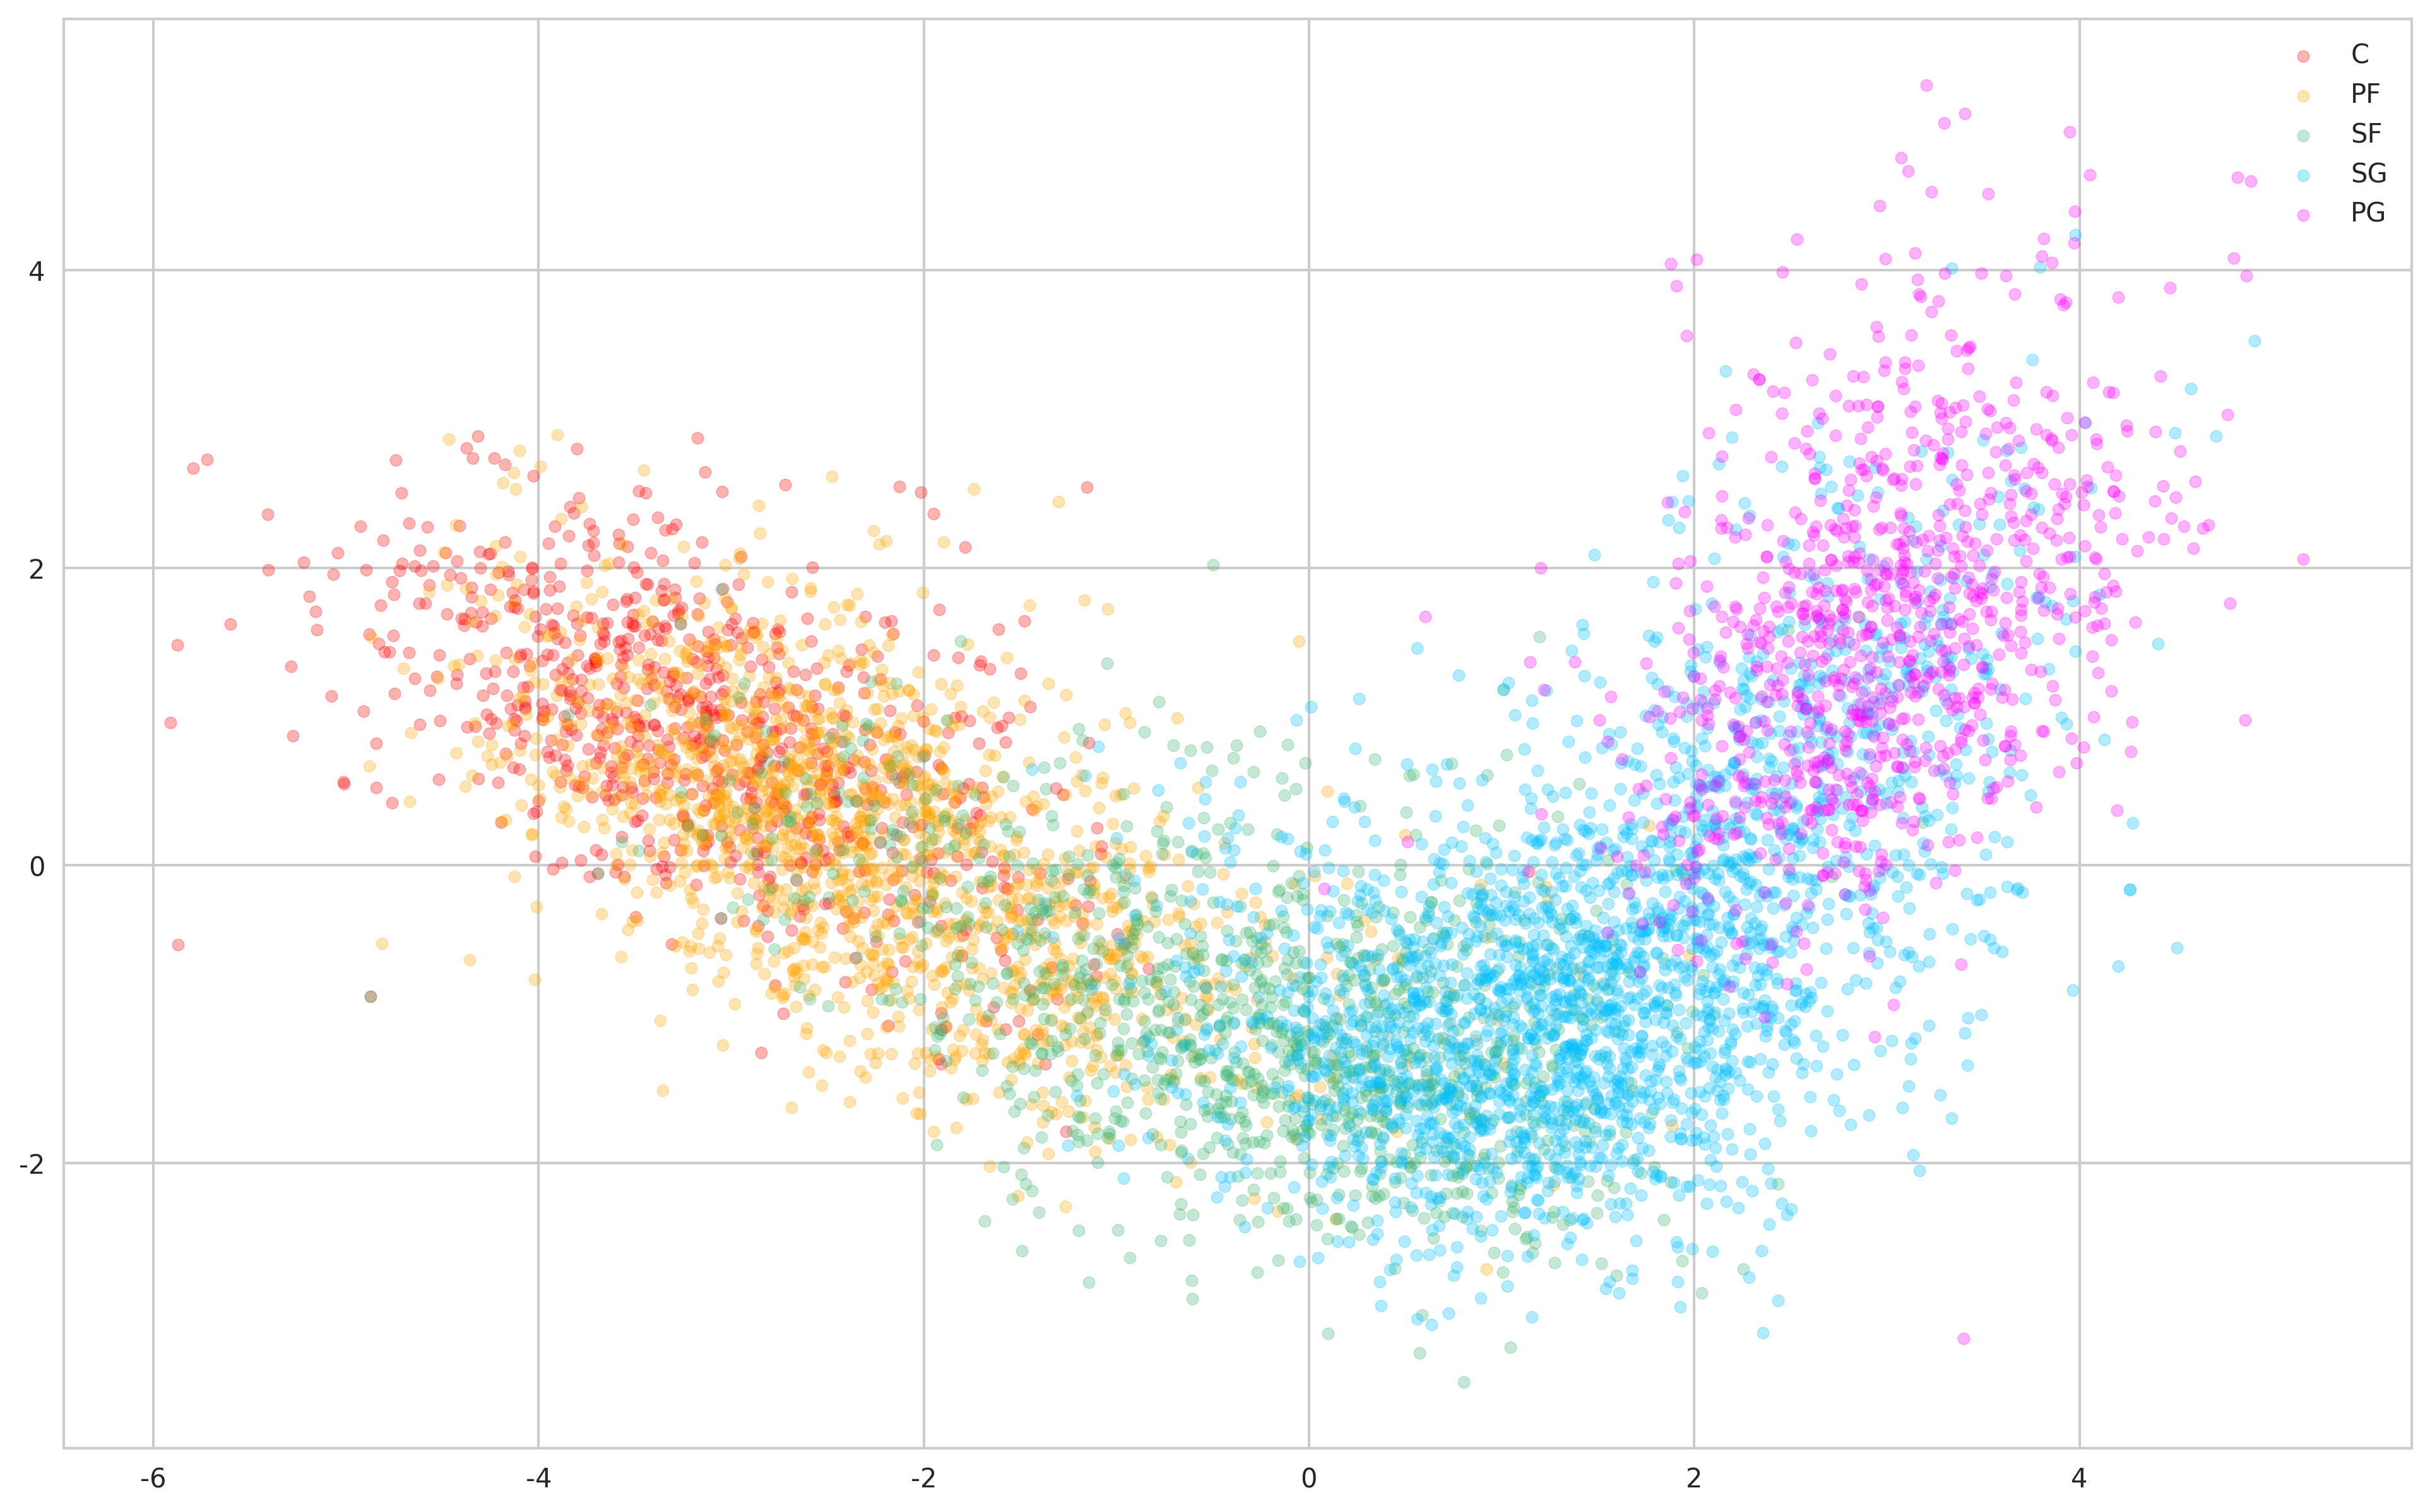

In [484]:
plt.figure(figsize=(16,10),dpi=300)
plt.scatter(ldaDf[ldaDf["pos"]=="C"].iloc[:,0], ldaDf[ldaDf["pos"]=="C"].iloc[:,1], color="red", marker="o", s=20, alpha=0.3, label="C")
plt.scatter(ldaDf[ldaDf["pos"]=="PF"].iloc[:,0], ldaDf[ldaDf["pos"]=="PF"].iloc[:,1], color="orange", marker="o", s=20, alpha=0.3, label="PF")
plt.scatter(ldaDf[ldaDf["pos"]=="SF"].iloc[:,0], ldaDf[ldaDf["pos"]=="SF"].iloc[:,1], color="mediumseagreen", marker="o", s=20, alpha=0.3, label="SF")
plt.scatter(ldaDf[ldaDf["pos"]=="SG"].iloc[:,0], ldaDf[ldaDf["pos"]=="SG"].iloc[:,1], color="deepskyblue", marker="o", s=20, alpha=0.3, label="SG")
plt.scatter(ldaDf[ldaDf["pos"]=="PG"].iloc[:,0], ldaDf[ldaDf["pos"]=="PG"].iloc[:,1], color="magenta", marker="o", s=20, alpha=0.3, label="PG")
plt.legend()
plt.show()

### 기존 포지션에 대한 실루엣 coefficient

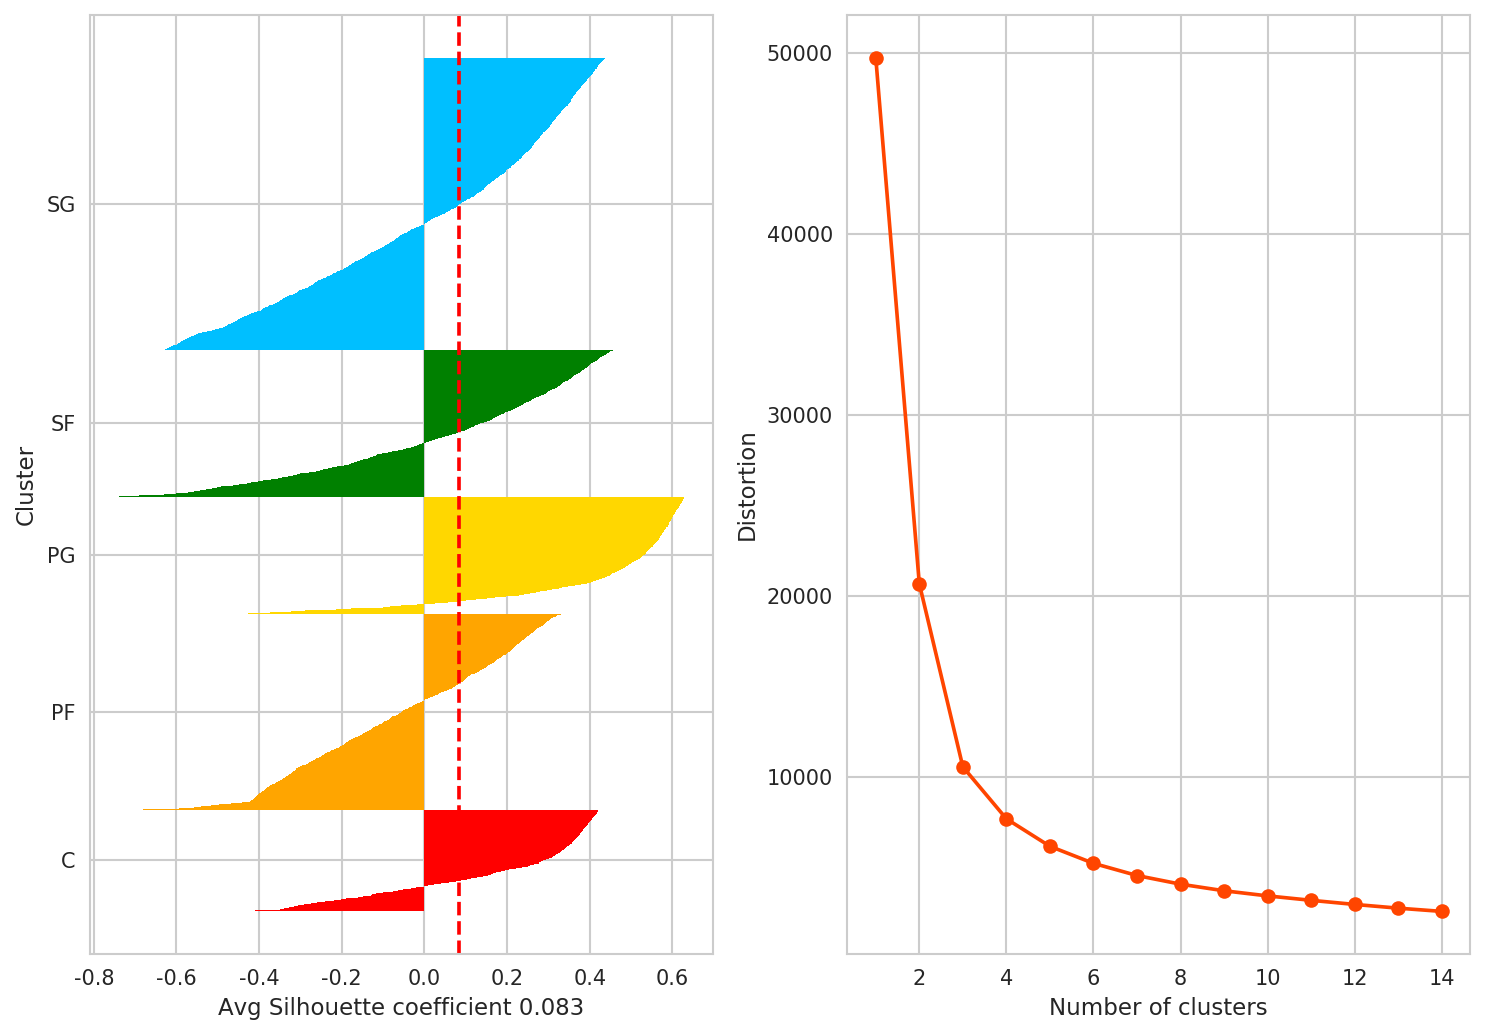

In [485]:
silhouette_plot(ldaDf.iloc[:,:2], dfy)

## 10개로 포지션을 재정의한 후 시각화

In [486]:
del ldaDf["pos"]

### 클러스터링 모형 최적화 

In [490]:
from sklearn.model_selection import GridSearchCV 

def silhouette_score(estimator, X):
    
    from sklearn.metrics import silhouette_samples   
    
    clusters = estimator.fit_predict(X)
    silhouette_vals = silhouette_samples(X, clusters, metric="euclidean")
    score = np.mean(silhouette_vals)
    return score

kms = KMeans(n_clusters=10)
param_init = ["k-means++", "random"]
param_algo = ["auto", "full"]
param_grid = {"init" : param_init, "algorithm" : param_algo}

gs = GridSearchCV(kms, param_grid = param_grid, scoring=silhouette_score, n_jobs=1)
X = ldaDf.iloc[:,:2]
gs.fit(X)

GridSearchCV(cv=None, error_score='raise',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'init': ['k-means++', 'random'], 'algorithm': ['auto', 'full']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function silhouette_score at 0x1222df668>, verbose=0)

In [491]:
gs.best_params_

{'algorithm': 'full', 'init': 'random'}

In [492]:
gs.best_score_

0.33840862592783494

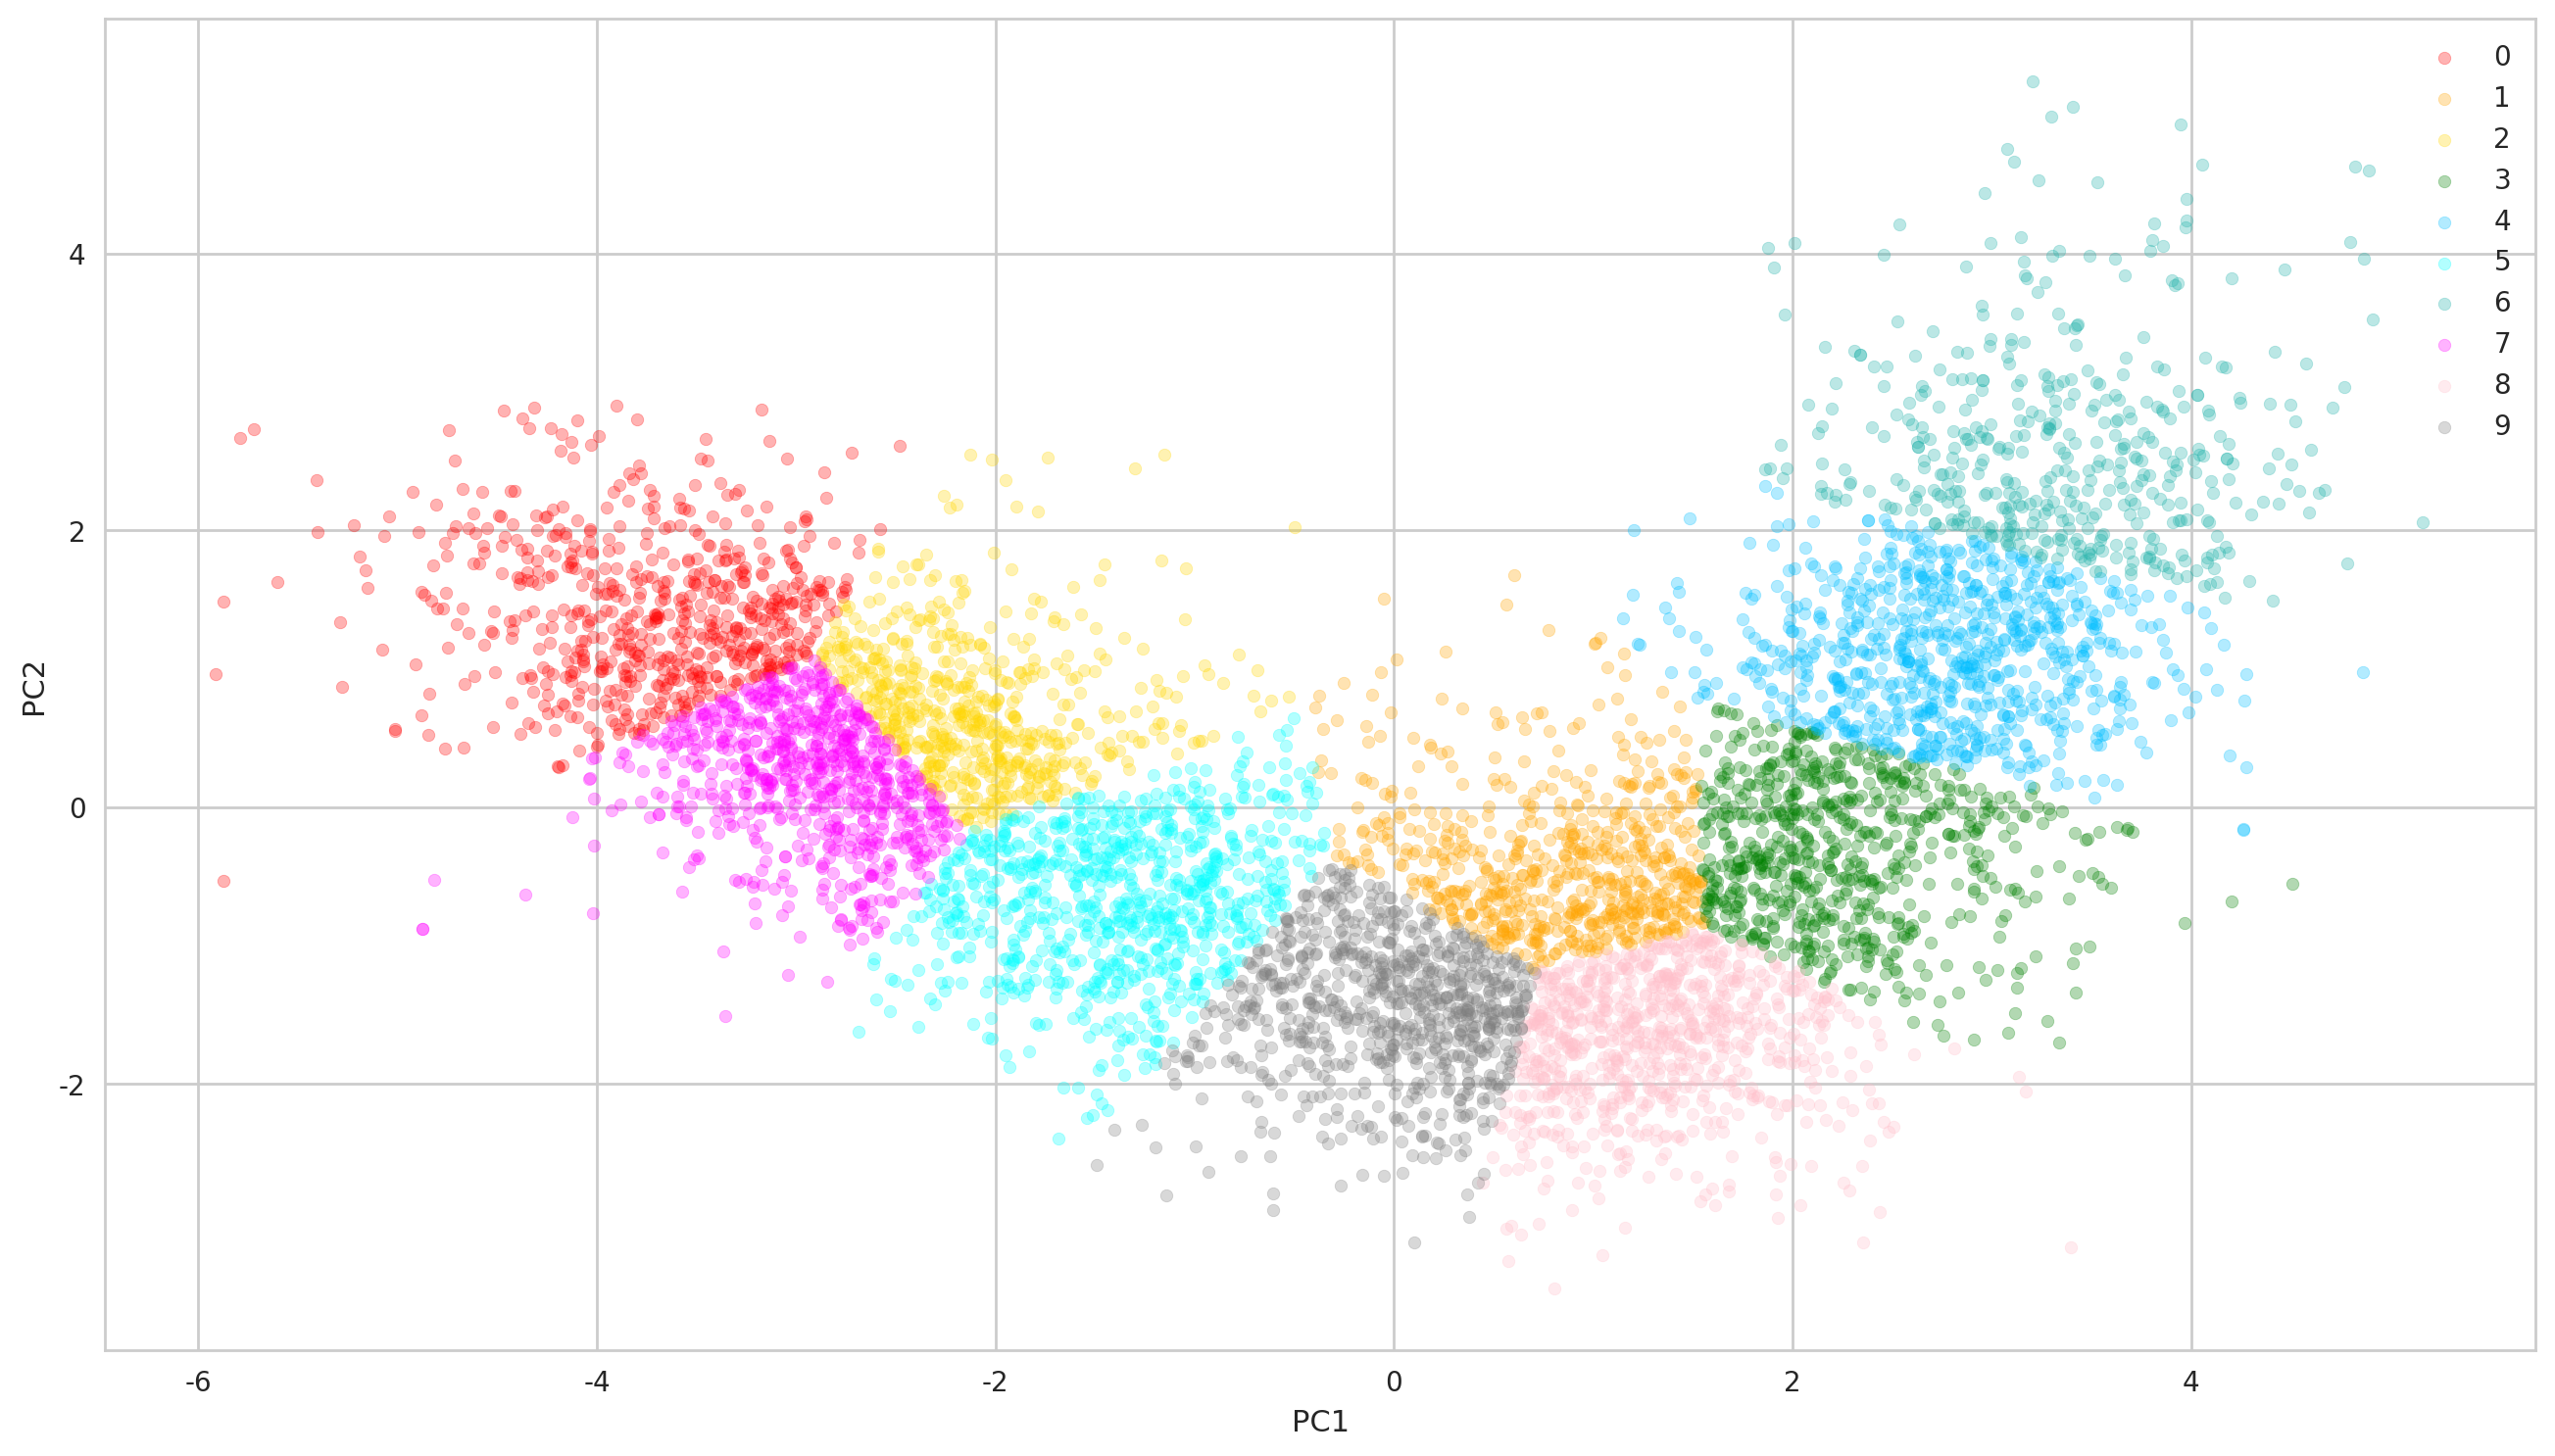

In [493]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, init="random", algorithm="full").fit(ldaDf)
model = model.predict(ldaDf)
ldaDf["cluster"] = model
position_plot(ldaDf, 10)

### 재정의한 포지션에 대한 실루엣 coefficient

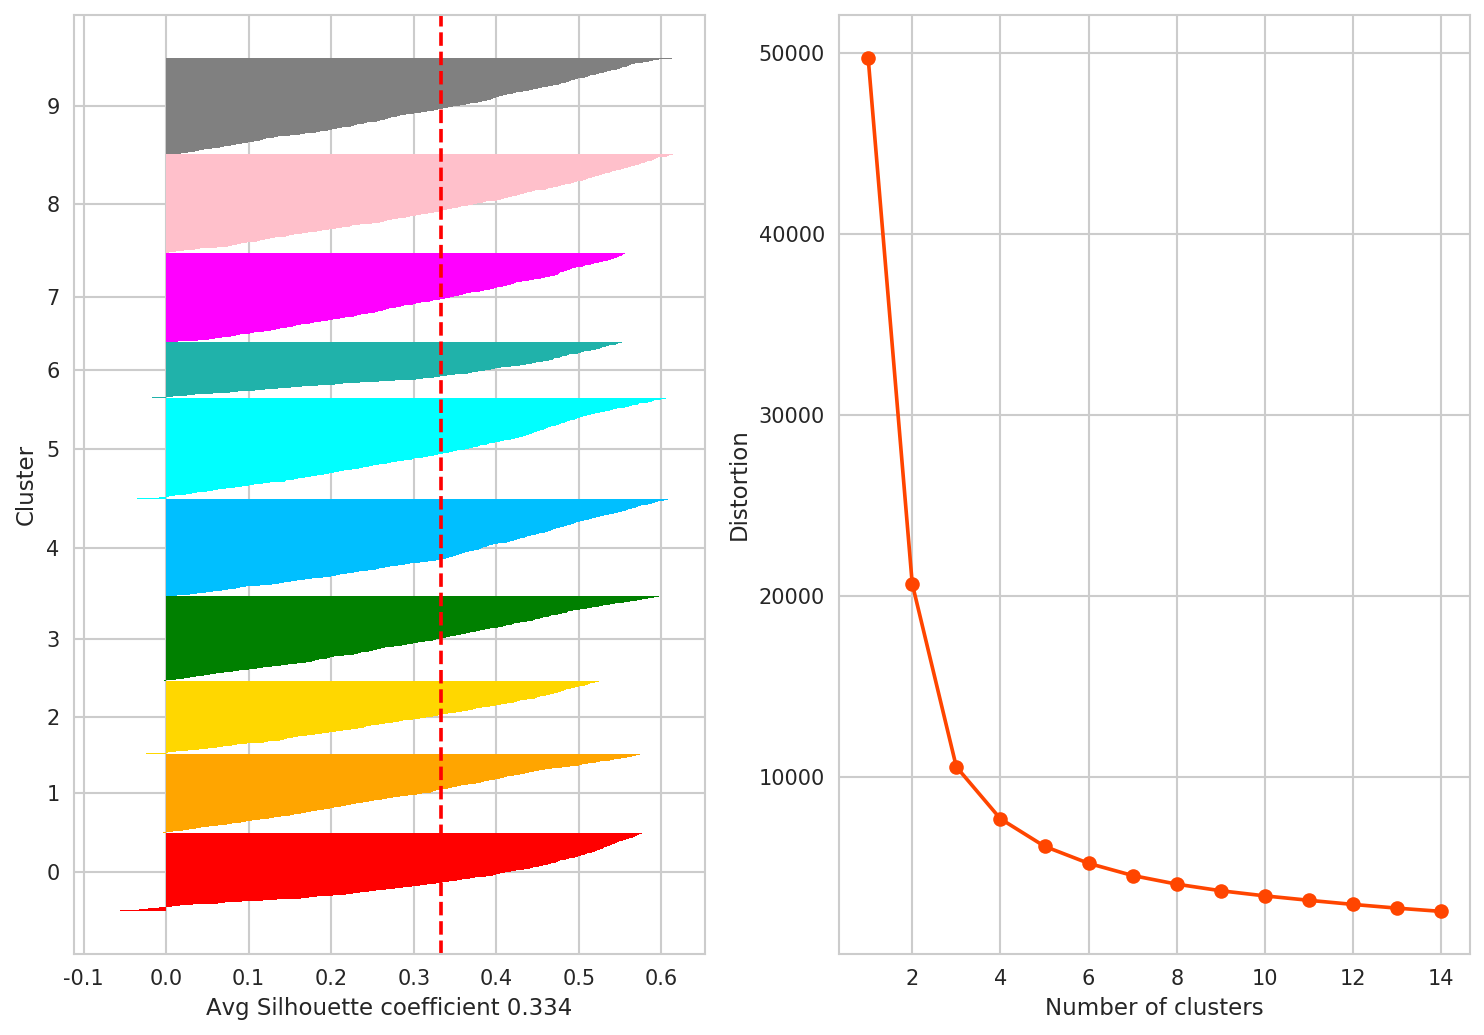

In [494]:
silhouette_plot(ldaDf.iloc[:,:2], model)

### 클러스터 특징 파악 

In [495]:
pd.DataFrame(ldaDf["cluster"].value_counts())

cluster
5      816
8      800
4      790
9      784
7      721
3      690
1      647
0      633
2      587
6      461

In [496]:
dfX["cluster"] = ldaDf["cluster"]

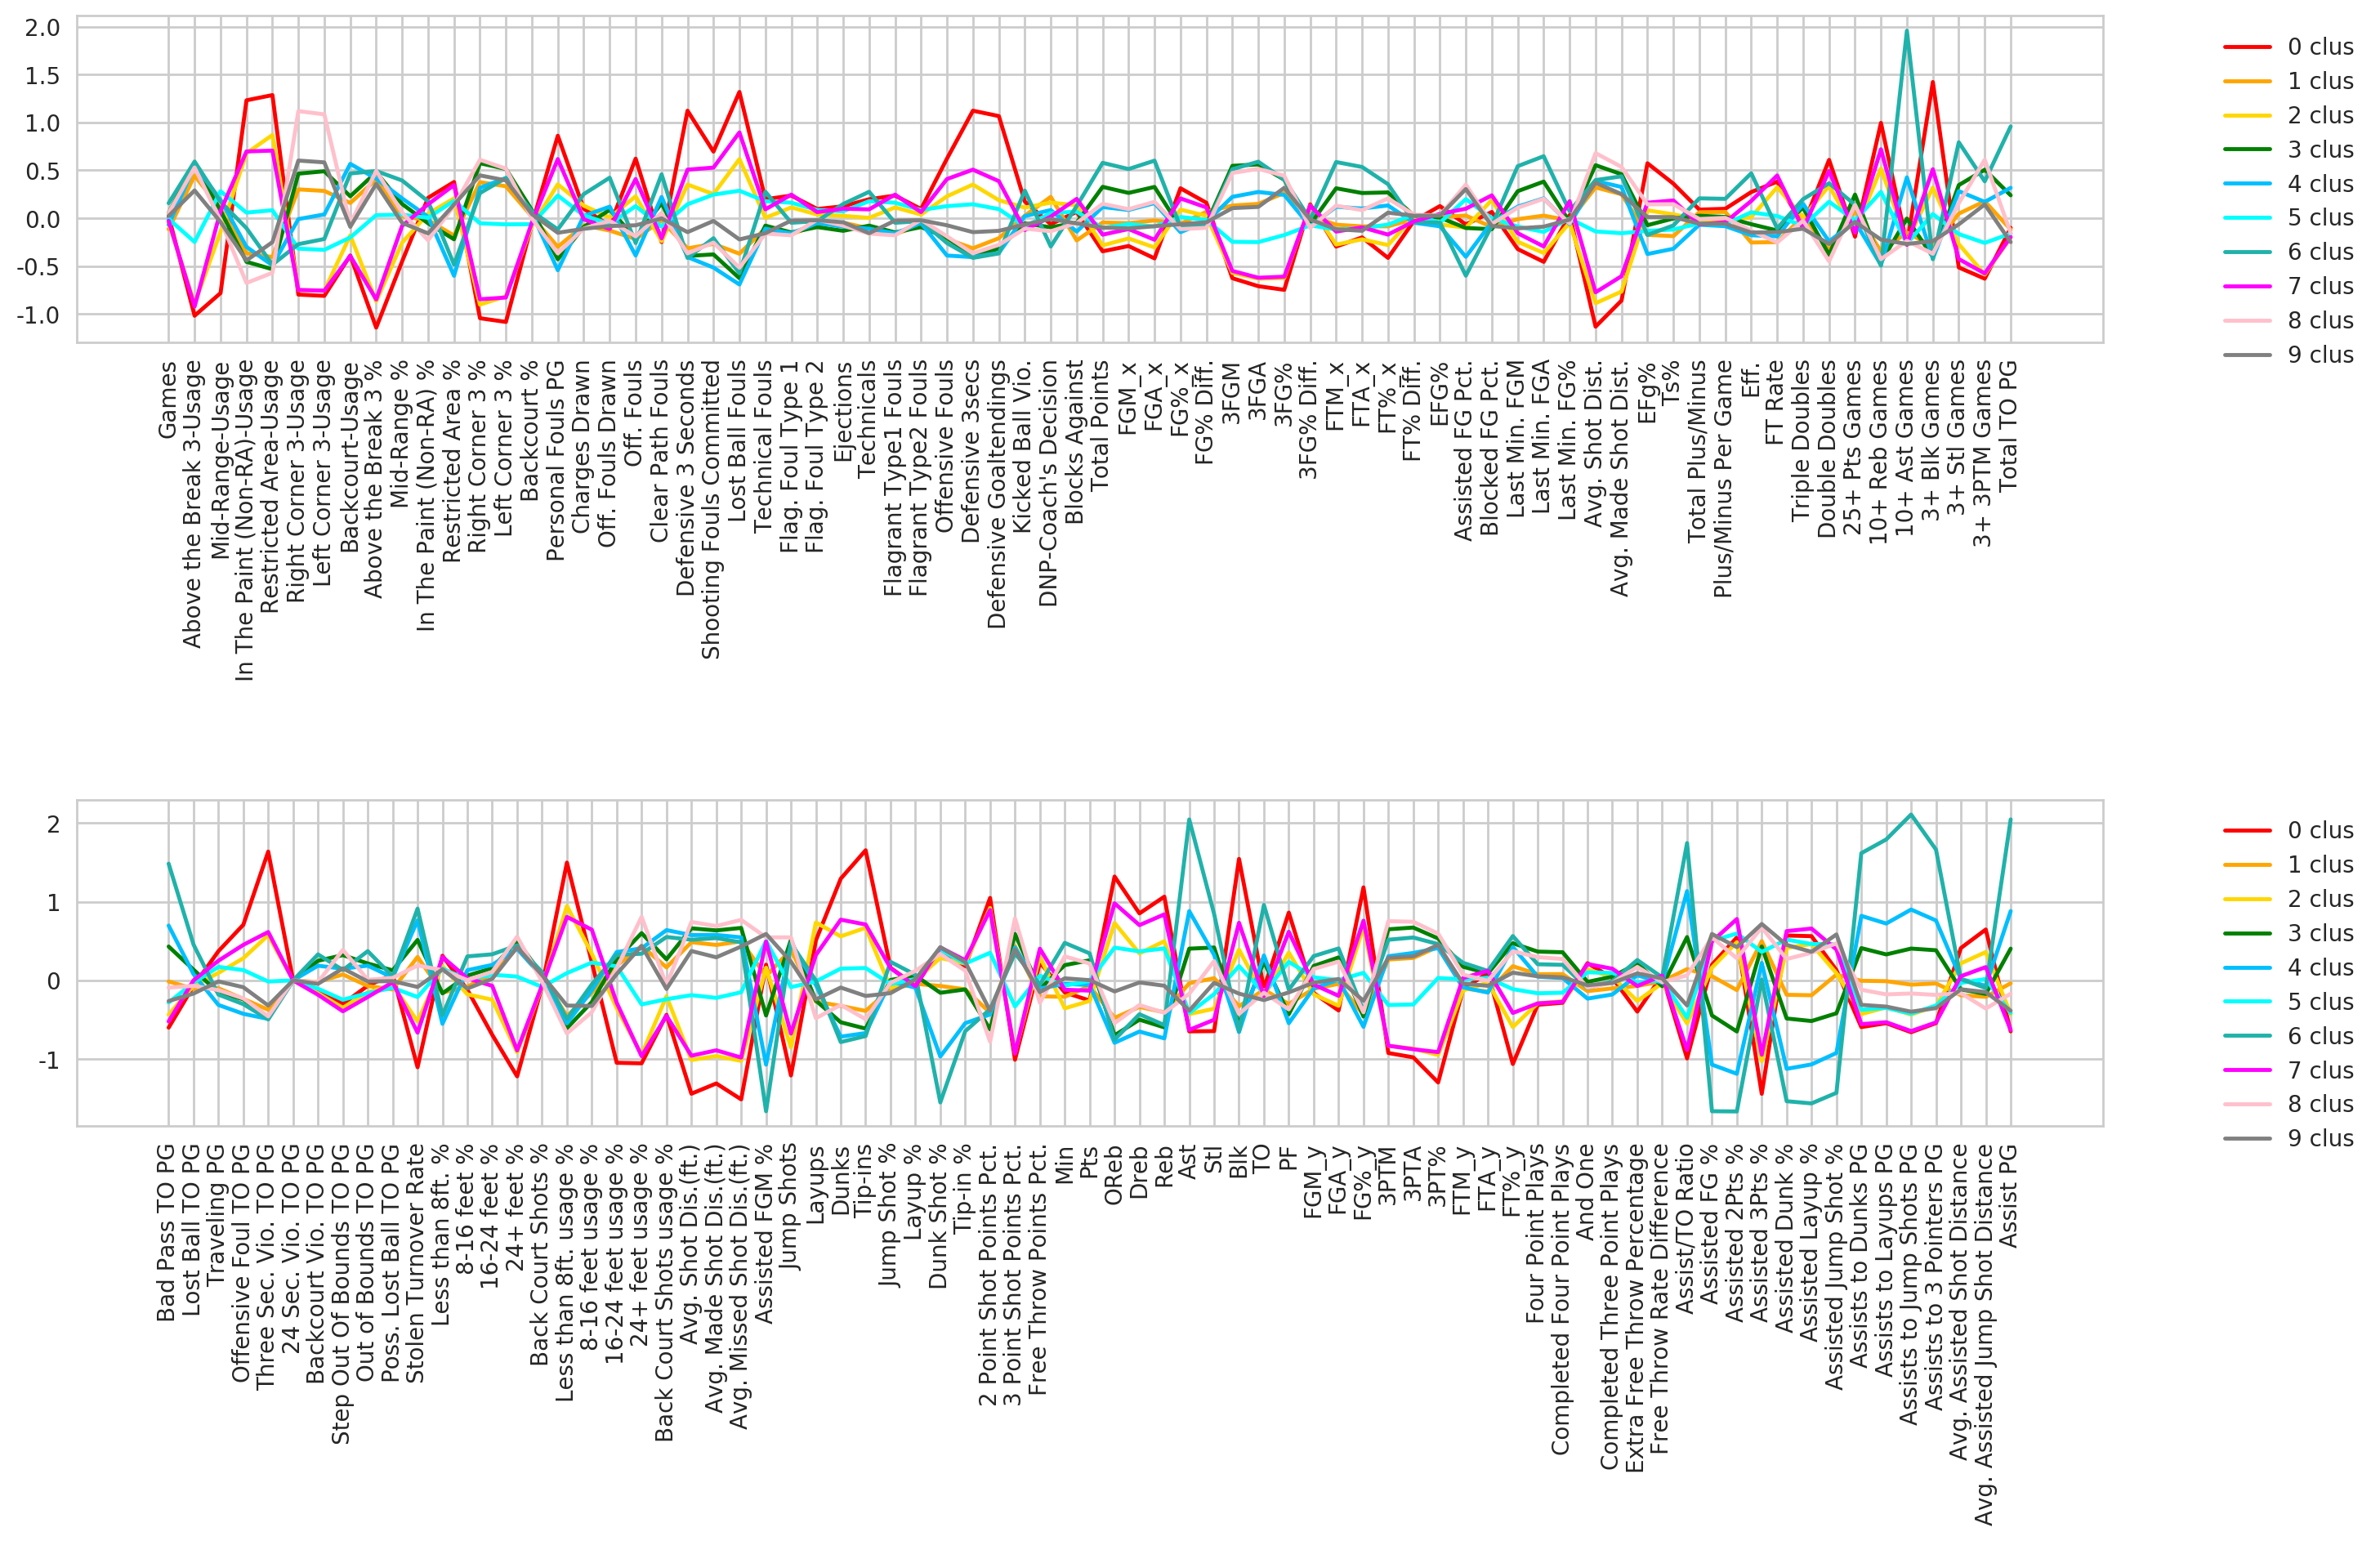

In [497]:
cluster_plot(dfX, 10)

--------

---------

In [504]:
std_score = dfX.groupby("cluster").mean()
std_score

Games  Above the Break 3-Usage  Mid-Range-Usage  \
cluster                                                       
0        0.020665                -1.019937        -0.783168   
1       -0.115521                 0.444700         0.097554   
2       -0.050005                -0.895391        -0.142069   
3        0.055677                 0.571880         0.078307   
4       -0.069924                 0.550521         0.191893   
5       -0.007862                -0.248986         0.281437   
6        0.156324                 0.591498         0.171502   
7       -0.027937                -0.923622         0.073541   
8        0.055493                 0.529437        -0.024194   
9        0.022877                 0.289361        -0.040800   

         In The Paint (Non-RA)-Usage  Restricted Area-Usage  \
cluster                                                       
0                           1.231491               1.285921   
1                          -0.366468              -0.407122   
2                           0.678249               0.868779   
3                          -0.456728              -0.534038   
4                          -0.300281              -0.493693   
5                           0.057786               0.082248   
6                          -0.105344              -0.486747   
7                           0.697149               0.705660   
8                          -0.678111              -0.571009   
9                          -0.442529              -0.250952   

         Right Corner 3-Usage  Left Corner 3-Usage  Backcourt-Usage  \
cluster                                                               
0                   -0.799058            -0.812396        -0.390562   
1                    0.300577             0.284271         0.158235   
2                   -0.750893            -0.758467        -0.179919   
3                    0.464914             0.489824         0.228464   
4                   -0.010077             0.038590         0.566981   
5                   -0.319019            -0.331434        -0.202296   
6                   -0.272072            -0.218052         0.466688   
7                   -0.750981            -0.758130        -0.395281   
8                    1.118418             1.084643        -0.061241   
9                    0.601712             0.582843        -0.090782   

         Above the Break 3 %  Mid-Range %  In The Paint (Non-RA) %  \
cluster                                                              
0                  -1.144509    -0.451480                 0.212296   
1                   0.404573     0.017082                -0.020607   
2                  -0.869373    -0.255784                 0.046277   
3                   0.479325     0.147628                -0.054201   
4                   0.412522     0.206009                 0.013529   
5                   0.031145     0.036094                 0.003839   
6                   0.492434     0.393267                 0.175693   
7                  -0.849631    -0.080080                 0.144618   
8                   0.494573     0.057878                -0.231063   
9                   0.358304    -0.049802                -0.159503   

         Restricted Area %  Right Corner 3 %  Left Corner 3 %  Backcourt %  \
cluster                                                                      
0                 0.377628         -1.046029        -1.084882    -0.065769   
1                -0.182449          0.375761         0.332922     0.016778   
2                 0.206489         -0.903573        -0.817052    -0.080538   
3                -0.221368          0.573911         0.514190     0.083891   
4                -0.602962          0.316542         0.419355     0.053076   
5                 0.181386         -0.053953        -0.065182    -0.063159   
6                -0.485307          0.261985         0.419766     0.071696   
7                 0.345697         -0.847917        -0.829816    -0.047265   
8                 0.1280

In [505]:
good = [] 
bad = []
for i in range(10):
    good.append(np.array(std_score.T.sort_values(by=i, ascending=False).head(5).index))
    bad.append(np.array(std_score.T.sort_values(by=i, ascending=True).head(5).index))

good[0] = ["3PT%", "3 Point Shot Points Pct.", "3FG%", "3PTA", "3PTM"]
good[1] = ["OReb", "2 Point Shot Points Pct.", "Reb", "Dunks", "FG%_y"]
good[2] = ["Tip-ins", "Blk", "OReb", "Dunks", "FG%_y"]
good[3] = ["3 Point Shot Points Pct.", "3PTM", "3PTA", "Jump Shots", "3PT%"]
good[4] = ["3PTA", "3PTM", "3FGA", "3FGA", "Stl"]
good[5] = ["2 Point Shot Points Pct.", "Layups", "OReb", "FG%_y", "Tip-ins"]
good[6] = ["Ast", "Stl", "TO", "Last Min. FGA", "3FGA"]
good[7] = ["Ast", "Jump Shots", "FT%_y", "3 Point Shot Points Pct.", "3PT%"]
good[8] = ["OReb", "Reb", "Dunk Shot %", "2 Point Shot Points Pct.", "Dreb"]
good[9] = ["3PT%", "3PTA", "3PTM", "3FG%", "FT%_y"]

In [544]:
good[0] = ['Reb', 'Blk', 'Double Doubles', 'FG% Diff.', 'Dunks']
good[1] = ['Pts', 'Ast', '3PT%', 'Stl', 'Min']
good[2] = ['OReb', 'Blk', 'FG%_y', 'Double Doubles', 'Pts']
good[3] = ['Triple Doubles', 'Pts', 'Ast', 'Stl', '3PT%']
good[4] = ['Jump Shots', 'Ast', 'Stl', 'Double Doubles', '3FG%']
good[5] = ['Double Doubles', 'Reb', 'Pts', 'Blk', 'Dunks']
good[6] = ['Ast', 'Pts', 'Triple Doubles', 'Double Doubles', '3FG%']
good[7] = ['OReb', 'Pts', 'Blk', 'FG%_y', 'Double Doubles']
good[8] = ['3PT%', 'Pts', 'Stl', 'Four Point Plays', '3+ 3PTM Games']
good[9] = ['3PT%', 'Pts', 'Assisted FGM %', '3+ 3PTM Games', 'Dunk Shot %']

In [545]:
point = []
for i in range(dfX.shape[0]):
    for j in range(10):
        if dfX["cluster"][i]==j:
            temp_good = np.array(dfX[good[j]])[i]
            #temp_bad = np.array(dfX[bad[j]])[i]
            coef_good = abs(np.array(std_score[good[j]])[j])
            #coef_bad = abs(np.array(std_score[bad[j]])[j])
            score_good = np.dot(temp_good, coef_good.T)
            #score_bad = np.dot(temp_bad, coef_good.T)
            point.append(score_good) #+score_bad))
            np.array(point)

In [546]:
data = data.reset_index()
del data["index"]

In [547]:
dfX["score"] = point
dfX["Player"] = data["Player"]
dfX["Season"] = data["Season"]

In [548]:
rank = []
for i in range(10):
        rank.append(dfX[dfX["cluster"]==i][["Player", "Season", "score"]].sort_values(by="score", ascending=False))

In [549]:
season = np.unique(rank[0]["Season"])

In [550]:
for i in range(len(season)):
    for j in range(10):
        print("               " + season[i] )
        print("      " + str(j) + " cluster player ranking ")
        print("----------------------------------------")
        print(rank[j][rank[j]["Season"]==season[i]][["Player", "score"]].sort_values(by="score", ascending=False).head(10))
        print("")
        print("")

               1996-1997
      0 cluster player ranking 
----------------------------------------
                Player      score
1687   Dikembe Mutombo  16.439183
81    Shaquille O'Neal  14.924896
1736     Shawn Bradley  11.952080
4269     Ervin Johnson  11.643526
3444       Will Perdue   8.832872
4160     Greg Ostertag   7.679959
1668   Jayson Williams   7.296556
6245     Jim McIlvaine   6.236700
5046      Theo Ratliff   5.325657
1922    Olden Polynice   5.181679


               1996-1997
      1 cluster player ranking 
----------------------------------------
              Player     score
18    Michael Jordan  0.991046
438   Scottie Pippen  0.889834
1381   Doug Christie  0.884360
1043   Anthony Mason  0.827739
741    Clyde Drexler  0.806130
1189        Rick Fox  0.727442
1661       Ray Allen  0.575095
1713   Rodney Rogers  0.496263
2130  Jamal Mashburn  0.415733
1714      Toni Kukoc  0.391650


               1996-1997
      2 cluster player ranking 
----------------------------

----------------------------------------
               Player     score
530     Reggie Miller  4.031808
1339    Wesley Person  3.747073
921       Eddie Jones  3.021780
1099      Rex Chapman  2.693801
241         Glen Rice  2.367262
181    Mitch Richmond  2.350119
846     Kerry Kittles  2.033335
1903    Voshon Lenard  1.925910
991     Doug Christie  1.787057
2333  Eric Piatkowski  1.538874


               1997-1998
      9 cluster player ranking 
----------------------------------------
              Player     score
2175      Dale Ellis  2.131385
1259    Tracy Murray  1.654696
6148    Fred Hoiberg  1.470143
6240   Kevin Edwards  1.386938
6729   David Wingate  1.371402
2696   Walt Williams  1.191442
2747   Tyrone Corbin  1.150602
1970    Sam Mitchell  1.111896
5382   Scott Burrell  1.100779
4044  George McCloud  1.095508


               1998-1999
      0 cluster player ranking 
----------------------------------------
                Player      score
456    Alonzo Mourning  15.93203

5019      Wesley Person  0.102149


               2003-2004
      2 cluster player ranking 
----------------------------------------
              Player     score
240       Tim Duncan  6.244254
782        Pau Gasol  3.475594
4436   Greg Ostertag  2.704821
3096  Stromile Swift  1.546135
2906       Vin Baker  1.182665
2886     Vlade Divac  1.084902
2288  Maurice Taylor  0.940643
5937      Dale Davis  0.914931
5763       Bo Outlaw  0.895092
6230   Danny Fortson  0.830365


               2003-2004
      3 cluster player ranking 
----------------------------------------
                Player     score
78       Allen Iverson  3.355167
513     Gilbert Arenas  2.823466
357       LeBron James  2.214162
195          Ray Allen  2.157273
2546       Brent Barry  2.055970
674         Mike Bibby  2.054353
913   Chauncey Billups  1.885074
1320      Andre Miller  1.847080
1829     Manu Ginobili  1.736783
2783     Doug Christie  1.734088


               2003-2004
      4 cluster player ranking 
---

      2 cluster player ranking 
----------------------------------------
             Player     score
614     Brook Lopez  4.584059
432       David Lee  4.555503
752      Tim Duncan  4.397715
531   Carlos Boozer  4.354896
1144     Josh Smith  4.173484
875    Al Jefferson  3.474535
5210    Ben Wallace  3.408957
1496     Kevin Love  3.295005
1553           Nene  3.219405
2247   Paul Millsap  2.821031


               2009-2010
      3 cluster player ranking 
----------------------------------------
              Player     score
102      Monta Ellis  3.010790
2052  Raymond Felton  1.949886
329      Joe Johnson  1.714367
313      Brandon Roy  1.426307
964      Jason Terry  1.397649
1497  Louis Williams  1.314610
922      Eric Gordon  1.152445
1196      J.R. Smith  1.064647
2722       CJ Watson  1.064048
731   Jamal Crawford  0.914911


               2009-2010
      4 cluster player ranking 
----------------------------------------
                 Player     score
811       Stephen Curr

----------------------------------------
                Player     score
3         Kevin Durant  1.076637
2108       Kyle Korver  0.849250
977   Chandler Parsons  0.769011
1768     Nicolas Batum  0.665650
1389        J.R. Smith  0.641968
479           Rudy Gay  0.618974
1122      Gerald Green  0.535836
3544    Josh McRoberts  0.435212
2520     Terrence Ross  0.402581
1519       Evan Turner  0.388181


               2013-2014
      2 cluster player ranking 
----------------------------------------
             Player     score
1905    Joakim Noah  4.520096
149   Blake Griffin  3.966108
830   Zach Randolph  3.582342
1233    Greg Monroe  3.475171
701       David Lee  3.350652
833       Pau Gasol  3.026980
4071  Mason Plumlee  2.807789
1976    Enes Kanter  2.593936
1371     Marc Gasol  1.434767
4859   Jeremy Evans  1.377975


               2013-2014
      3 cluster player ranking 
----------------------------------------
                Player     score
57        LeBron James  2.923155


In [551]:
dfX[dfX["Player"] == "Yao Ming"]

Games  Above the Break 3-Usage  Mid-Range-Usage  \
122  -1.208433                -1.032278         0.046727   
239  -0.585852                -1.041509         0.071566   
264  -0.724203                -1.032988         0.083295   
505   0.797662                -1.042220        -0.178196   
679   1.005189                -1.049321         0.000501   
817   1.143540                -1.035118         0.299249   
1654  1.143540                -1.040799         0.282000   

      In The Paint (Non-RA)-Usage  Restricted Area-Usage  \
122                      2.755046              -0.087892   
239                      2.232268               0.135513   
264                      2.353993               0.063953   
505                      2.824237               0.079080   
679                      1.990099               0.312957   
817                      2.205360              -0.048912   
1654                     1.895281               0.104097   

      Right Corner 3-Usage  Left Corner 3-Usage  Backcourt-Usage  \
122              -0.807911            -0.819902        -0.605131   
239              -0.807911            -0.819902        -0.605131   
264              -0.807911            -0.819902        -0.605131   
505              -0.807911            -0.819902        -0.605131   
679              -0.807911            -0.819902        -0.605131   
817              -0.807911            -0.819902        -0.605131   
1654             -0.807911            -0.819902        -0.243742   

      Above the Break 3 %  Mid-Range %  In The Paint (Non-RA) %  \
122             -1.416852     1.323421                 0.696012   
239             -1.416852     0.211589                 1.072073   
264             -1.416852     0.368553                 0.794975   
505              4.330930     1.231858                 1.556993   
679             -1.416852     0.708643                 0.913731   
817             -1.416852     0.944090                 0.270470   
1654             4.330930    -0.010777                 0.448604   

      Restricted Area %  Right Corner 3 %  Left Corner 3 %  Backcourt %  \
122            0.749974         -1.113492        -1.123998    -0.142233   
239            1.095530         -1.113492        -1.123998    -0.142233   
264            0.954748         -1.113492        -1.123998    -0.142233   
505            0.621990         -1.113492        -1.123998    -0.142233   
679            1.684256         -1.113492        -1.123998    -0.142233   
817            1.773845         -1.113492        -1.123998    -0.142233   
1654           1.325901         -1.113492        -1.123998    -0.142233   

      Personal Fouls PG  Charges Drawn  Off. Fouls Drawn  Off. Fouls  \
122            1.730224      -0.375156         -0.098259    1.439064   
239            1.894365      -0.375156          0.377187    1.942648   
264            1.431787      -0.375156         -0.003170    2.244799   
505            1.774990      -0.375156          0.282097    3.251967   
679            2.356942      -0.375156         -0.763883    2.949817   
817            1.760068      -0.375156         -0.763883    2.647666   
1654           0.969210      -0.375156         -0.763883    0.633329   

      Clear Path Fouls  Defensive 3 Seconds  Shooting Fouls Committed  \
122           -0.45576             3.449663                  0.368800   
239           -0.45576             4.130662                  1.221315   
264           -0.45576             1.747166                  0.688493   
505           -0.45576             3.449663                  2.420164   
679           -0.45576             2.768665                  3.059551   
817           -0.45576             3.790163                  1.913983   
1654          -0.45576             0.385169                  2.127112   

      Lost Ball Fouls  Technical Fouls  Flag. Foul Type 1  Flag. Foul Type 2  \
122          0.482283        -0.332334          -0.464094          -0.168668   
239          0.604556         0.362728    

In [518]:
name_prop = pd.read_csv("name_prop.csv")

In [519]:
name_prop

cluster      map                           name1                   name2  \
0        0    (4,3)                       Commander                   chief   
1        1    (0,0)  Secondary Ball Handler(scorer)                     NaN   
2        2   (0,-2)               Role-Playing wing           Balanced wing   
3        3    (2,0)         all round player(guard)             Elite Guard   
4        4  (-1,-1)                Midrange Monster                     NaN   
5        5    (3,1)                Defensive passer  defensive ball-handler   
6        6   (-4,2)                     Classic Big            Orthodox Big   
7        7   (-3,0)                   Offensive Big          Aggressive Big   
8        8   (-2,1)                 Non-scoring big                 sub-big   
9        9   (2,-2)                 Catch and shoot          3-point scorer   

              name3              name4           diff1 diff2            diff3  \
0         playmaker  Aggressive passer             Ast   Pts   Triple Doubles   
1               NaN                NaN             Pts   Ast            3PT %   
2               NaN                NaN           3PT %   Pts   Assisted FGM %   
3   Balanced scorer                NaN  Triple Doubles   Pts              Ast   
4               NaN                NaN  Double Doubles   Reb              Pts   
5               NaN                NaN      Jump Shots   Ast              Stl   
6  Defensive Anchor                NaN             Reb   Blk   Double Doubles   
7               NaN                NaN            Oreb   Pts              Blk   
8               NaN                NaN            Oreb   Blk           FG %_y   
9               NaN                NaN           3PT %   Pts              Stl   

              diff4             diff5  
0    Double Doubles             3FG %  
1               Stl               Min  
2     3+ 3PTM Games       Dunk Shot %  
3               Stl             3PT %  
4               Blk             Dunks  
5    Double Doubles             3FG %  
6         FG % diff             Dunks  
7            FG %_y    Double Doubles  
8    Double Doubles               Pts  
9   Four Point Play     3+ 3PTM Games

In [523]:
prop = []
for i in range(10):
    prop.append(np.array(name_prop[["diff1", "diff2", "diff3", "diff4", "diff5"]].iloc[i,:]))

In [524]:
prop

[array(['Ast', ' Pts', ' Triple Doubles', ' Double Doubles', ' 3FG %'], dtype=object),
 array(['Pts', ' Ast', ' 3PT %', ' Stl', ' Min'], dtype=object),
 array(['3PT %', ' Pts', ' Assisted FGM %', ' 3+ 3PTM Games', ' Dunk Shot %'], dtype=object),
 array(['Triple Doubles', ' Pts', ' Ast', ' Stl', ' 3PT %'], dtype=object),
 array(['Double Doubles', ' Reb', ' Pts', ' Blk', ' Dunks'], dtype=object),
 array(['Jump Shots', ' Ast', ' Stl', ' Double Doubles', ' 3FG %'], dtype=object),
 array(['Reb', ' Blk', ' Double Doubles', ' FG % diff', ' Dunks'], dtype=object),
 array(['Oreb', ' Pts', ' Blk', ' FG %_y', '  Double Doubles'], dtype=object),
 array(['Oreb', ' Blk', ' FG %_y', ' Double Doubles', ' Pts'], dtype=object),
 array(['3PT %', ' Pts', ' Stl', ' Four Point Play', ' 3+ 3PTM Games'], dtype=object)]

In [555]:
dfX[["Player", "Season", "cluster"]][dfX["Player"]=="Kevin Durant"].sort_values(by="Season", ascending=False)

Player     Season  cluster
119  Kevin Durant  2016-2017        5
33   Kevin Durant  2015-2016        1
3    Kevin Durant  2013-2014        1
36   Kevin Durant  2012-2013        9
37   Kevin Durant  2011-2012        9
41   Kevin Durant  2010-2011        9
11   Kevin Durant  2009-2010        9
108  Kevin Durant  2008-2009        8
428  Kevin Durant  2007-2008        8

In [556]:
good[1]

['Pts', 'Ast', '3PT%', 'Stl', 'Min']

In [557]:
good[5]

['Double Doubles', 'Reb', 'Pts', 'Blk', 'Dunks']